## Dimensionality reduction, Principal Component Analysis

### A more intuitive example

In [1]:
import pandas as pd
import numpy as np
from PIL import Image, ImageFilter, ImageOps
import matplotlib.pyplot as plt

## Hardcoded input args
imgList='./Data/ListImages.csv'
inDir='./Data/faces94'


In [2]:
## Read list of images
df = pd.read_csv(imgList)
df.shape

(3059, 4)

In [3]:
## Read images as numpy array
tmpRGB = np.asarray(Image.open(inDir + '/' + df.IMGPATH[0]))
imgSize = np.array(tmpRGB.shape)
imgSize = imgSize[[2,0,1]]                  

#dMat = np.zeros([df.shape[0], imgSize[0], np.prod(imgSize[1:])]).astype(np.uint8)
dMat = np.zeros([50, imgSize[0], np.prod(imgSize[1:])]).astype(np.uint8)

## Read images to data matrix
print('Reading images ...')
for i, tmpRow in df.head(50).iterrows():
    tmpRGB = np.asarray(Image.open(inDir + '/' + tmpRow.IMGPATH))
    tmpRGB = np.moveaxis(tmpRGB,2,0)
    tmpRGB = tmpRGB.reshape([tmpRGB.shape[0], tmpRGB.shape[1]*tmpRGB.shape[2]])
    
    dMat[i,:, :] = tmpRGB
    

Reading images ...


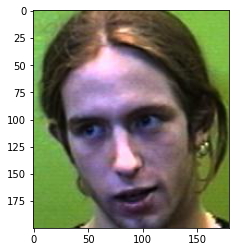

In [4]:
## Check few images
imTmp = dMat[37,:,:].reshape(imgSize)
imTmp = np.moveaxis(imTmp,0,2)
plt.imshow(imTmp)
plt.show()


In [5]:
## Read images as numpy array (as grayscale)
tmpRGB = np.asarray(Image.open(inDir + '/' + df.IMGPATH[0]))
imgSize = np.array(tmpRGB.shape[0:2])

dMat = np.zeros([df.shape[0], np.prod(imgSize)]).astype(np.uint8)

## Read images to data matrix
print('Reading images ...')
for i, tmpRow in df.iterrows():
    tmpRGB = Image.open(inDir + '/' + tmpRow.IMGPATH)
    tmpGray = np.asarray(ImageOps.grayscale(tmpRGB)).astype(np.uint8).flatten()

    dMat[i,:] = tmpGray

Reading images ...


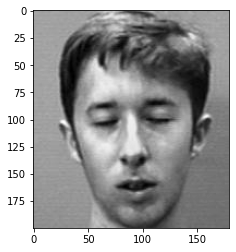

In [6]:
## Check few images
plt.imshow(dMat[217,:].reshape(imgSize).squeeze(), cmap='gray')
plt.show()

In [7]:
## Apply PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

NUM_COMP = 40

scaler = StandardScaler()
scaler.fit(dMat)
X = scaler.transform(dMat)

pca = PCA(n_components = NUM_COMP)
pcaMdl = pca.fit(X)
pcaCoor = pcaMdl.transform(X)
dfPCA = pd.DataFrame(data = pcaCoor, columns = ['PCA_' + s for s in np.arange(0, NUM_COMP).astype(str)])


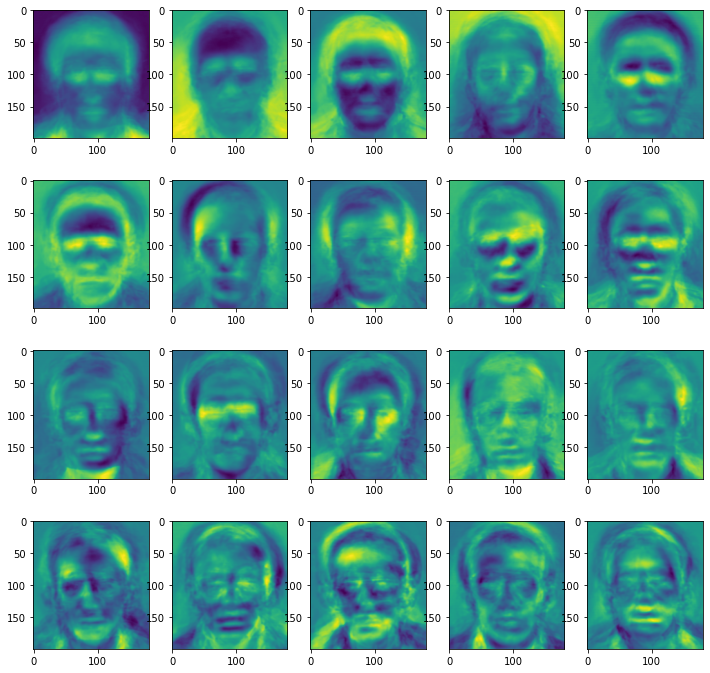

In [8]:
## Display eigenvectors (first n)
plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4,5,i+1)
    pImg = np.array(pcaMdl.components_[i,:]).reshape(imgSize)
    plt.imshow(pImg)
plt.show()


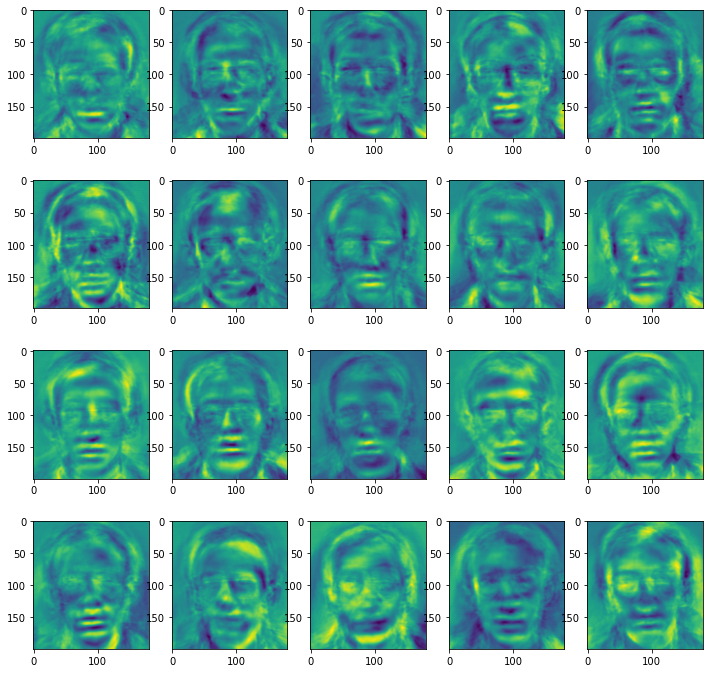

In [9]:
## Display eigenvectors (last n)
plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4,5,i+1)
    pImg = np.array(pcaMdl.components_[-i-1,:]).reshape(imgSize)
    plt.imshow(pImg)
plt.show()

In [10]:
print(pcaMdl.explained_variance_ratio_)
print(np.sum(pcaMdl.explained_variance_ratio_))

[0.31912278 0.08691527 0.0557538  0.04449223 0.03503958 0.02866017
 0.02606974 0.019956   0.01740436 0.01510249 0.01362615 0.01255702
 0.01153936 0.01046011 0.00953366 0.00887069 0.0083636  0.00747275
 0.00711898 0.00656838 0.00634791 0.00612384 0.00585673 0.00560912
 0.00516831 0.00510998 0.00488194 0.00470454 0.00440024 0.00424759
 0.00416463 0.00395532 0.00371108 0.00354933 0.00349398 0.0033366
 0.00324929 0.00320587 0.00309245 0.00300396]
0.8318398331582593


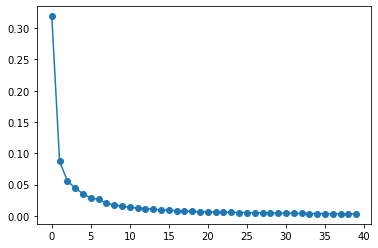

In [11]:
plt.plot(pcaMdl.explained_variance_ratio_, 'o-')

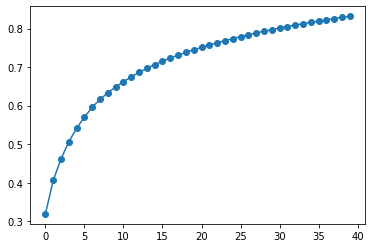

In [12]:
plt.plot(np.cumsum(pcaMdl.explained_variance_ratio_), 'o-')

### Reconstruction error using PCA

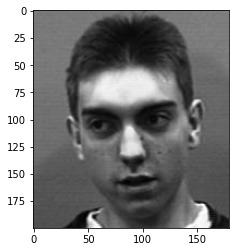

In [13]:
IMG_NO = 77

f1 = dMat[IMG_NO,:].reshape(imgSize)
plt.imshow(f1, cmap='gray')

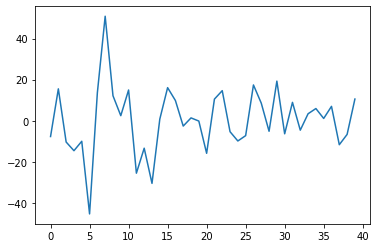

In [14]:
plt.plot(pcaCoor[IMG_NO,0:NUM_COMP])

#### A different subject

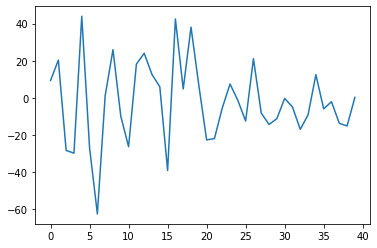

In [15]:
plt.plot(pcaCoor[0,0:NUM_COMP])

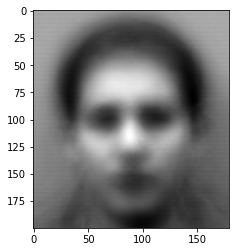

In [16]:
NUM_COMP = 1
imgRecon = np.dot(pcaCoor[IMG_NO, 0:NUM_COMP], pcaMdl.components_[0:NUM_COMP,:])
imgRecon = scaler.inverse_transform(imgRecon)
f1 = imgRecon.reshape(imgSize)
plt.imshow(f1, cmap='gray')

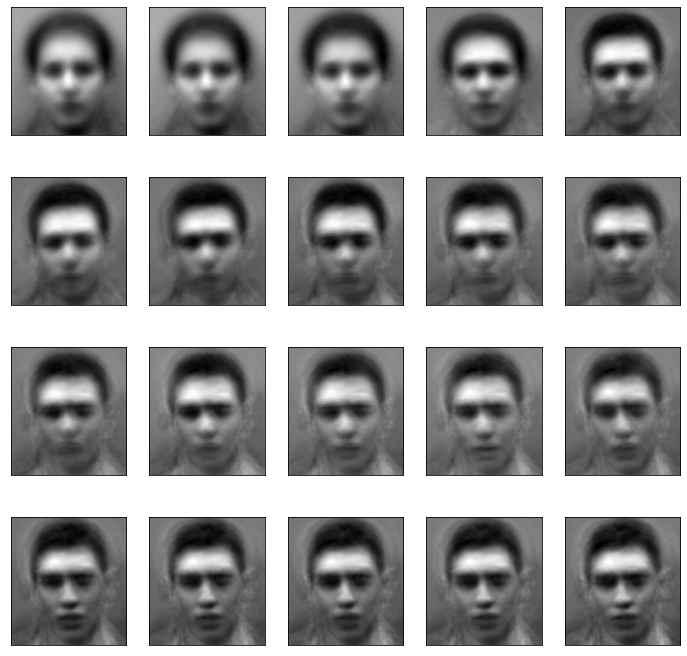

In [19]:
plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4,5,i+1)
    imgRecon = np.dot(pcaCoor[IMG_NO,0:i], pcaMdl.components_[0:i,:])
    imgRecon = scaler.inverse_transform(imgRecon)
    f1 = imgRecon.reshape(imgSize)
    plt.imshow(f1, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()


### Difference image

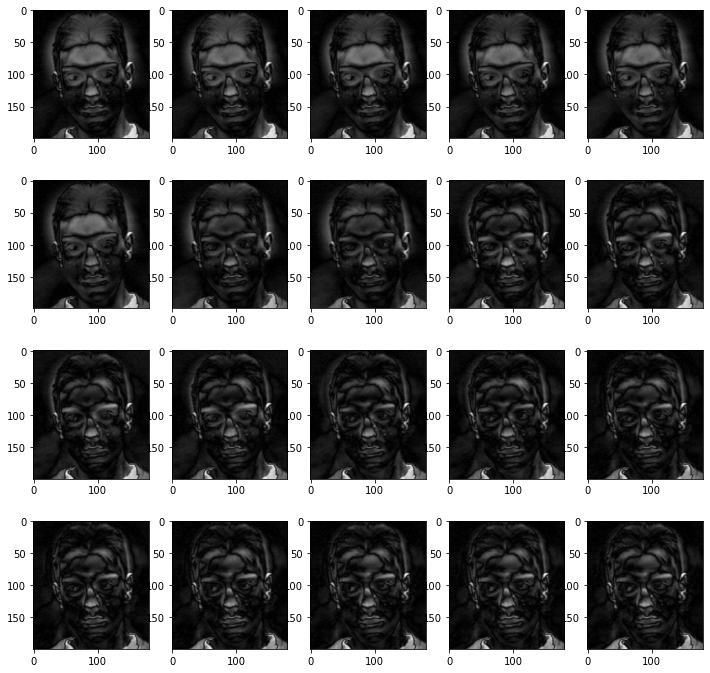

In [24]:
imgActual = dMat[IMG_NO,:]

plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4,5,i+1)
    imgRecon = np.dot(pcaCoor[IMG_NO,0:i], pcaMdl.components_[0:i,:])
    imgRecon = scaler.inverse_transform(imgRecon)
    imgDiff = np.abs(imgActual - imgRecon)
    f1 = imgDiff.reshape(imgSize)
    plt.imshow(f1, cmap='gray')
plt.show()


In [26]:
from numpy import linalg as LA

imgActual = dMat[IMG_NO, :]

for i in range(20):
    imgRecon = np.dot(pcaCoor[IMG_NO, 0:i], pcaMdl.components_[0:i,:])
    imgRecon = scaler.inverse_transform(imgRecon)
    imgDiff = np.abs(imgActual - imgRecon)
    print('Num PCA comp: ' + str(i) + ', reconstruction error: ' + str(LA.norm(imgDiff.flatten())))
        


Num PCA comp: 0, reconstruction error: 7028.541353258796
Num PCA comp: 1, reconstruction error: 7003.559691988666
Num PCA comp: 2, reconstruction error: 6939.209197539607
Num PCA comp: 3, reconstruction error: 6841.640963582366
Num PCA comp: 4, reconstruction error: 6774.450975075835
Num PCA comp: 5, reconstruction error: 6751.9314953843805
Num PCA comp: 6, reconstruction error: 6024.313564130905
Num PCA comp: 7, reconstruction error: 5990.2027766283
Num PCA comp: 8, reconstruction error: 5333.57181634157
Num PCA comp: 9, reconstruction error: 5320.018000736677
Num PCA comp: 10, reconstruction error: 5321.74784494947
Num PCA comp: 11, reconstruction error: 5287.356382272621
Num PCA comp: 12, reconstruction error: 5068.0116827671445
Num PCA comp: 13, reconstruction error: 5032.029258036186
Num PCA comp: 14, reconstruction error: 4842.939914725505
Num PCA comp: 15, reconstruction error: 4843.360146479063
Num PCA comp: 16, reconstruction error: 4815.534620902539
Num PCA comp: 17, reconstr